**Answer 6.1**

In [2]:
#Imporing necessary modules
import glob
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.vq import kmeans,vq

In [4]:
#Assigning the paths of csv files to a list
path = []
path.append(r'Large_Cap\Large_Cap')
path.append(r'Small_Cap\Small_Cap')
path.append(r'Mid_Cap\Mid_Cap')
path

['Large_Cap\\Large_Cap', 'Small_Cap\\Small_Cap', 'Mid_Cap\\Mid_Cap']

In [5]:
li =[]
fd = pd.DataFrame()
for path1 in path:
    all_files = glob.glob(path1 + "/*.csv")#Assigning the paths to the variable
    all_ten = all_files[0:10]#Selecting the first 10 files
    
    for filename in all_ten:
        df = pd.read_csv(filename,index_col=None,header=0)#Reading the csv files one by one
        df = df[df["Series"]=='EQ']#Selecting the columns which have Series=EQ
        df.reset_index(inplace=True)#Resetting the index
        fd[df.Symbol[0]] = df["Close Price"]#Assigning close price to another dataframe 
        li.append(fd)
frame = pd.concat(li,axis=1)
frame = frame.loc[:,~frame.columns.duplicated()]#Deleting the duplicate columns

In [6]:
frame.head()

,ADANIPORTS,ASIANPAINT,AXISBANK,BAJFINANCE,BPCL,CIPLA,DRREDDY,EICHERMOT,GAIL,HDFC,...,ADANIPOWER,AJANTPHARM,AMARAJABAT,APOLLOTYRE,BERGEPAINT,CASTROLIND,CUMMINSIND,DHFL,EXIDEIND,GMRINFRA
0,356.20,1148.05,500.1,1332.95,727.85,569.00,2675.80,28930.60,414.00,1559.50,...,30.25,1633.50,933.40,231.90,259.5,449.85,1066.05,431.40,245.80,17.55
1,354.50,1142.85,501.5,1347.75,733.30,565.60,2724.10,29362.50,411.40,1566.55,...,32.85,1634.25,924.70,234.40,261.5,443.00,1047.75,424.45,244.70,17.40
2,348.55,1154.95,502.8,1324.80,727.45,562.35,2736.90,29093.55,408.30,1552.50,...,33.10,1654.35,937.70,237.35,260.9,439.55,1016.45,429.00,243.20,17.30
3,347.90,1151.35,492.0,1314.55,714.90,560.10,2678.95,28357.30,404.75,1537.05,...,31.90,1633.40,912.10,232.65,254.1,433.95,1054.45,417.95,239.85,16.75
4,349.45,1123.15,501.7,1289.15,702.45,564.95,2656.45,27936.05,401.05,1520.60,...,32.40,1670.25,895.75,234.65,247.8,437.10,972.95,404.20,238.15,16.95


In [7]:
frame.isnull().sum().sum()#Total number of null values

421

In [9]:
frame.columns[frame.isna().any()].tolist()#Columns which have null values

['BOMDYEING', 'IRCON']

In [10]:
frame.drop(["BOMDYEING","IRCON"],axis=1,inplace=True)#Dropping the values having null values


In [11]:
frame.isnull().sum().sum()#Total number of null values

0

In [12]:
#Inserting a new column PVR
pvr = pd.read_csv("PVR.csv")
pvr = pvr[pvr["Series"]=='EQ']
pvr.reset_index(inplace=True)
frame["PVR"] = pvr["Close Price"]

In [13]:
#Inserting a new column VIPIND
vipin = pd.read_csv("VIPIND.csv")
vipin = vipin[vipin["Series"]=='EQ']
vipin.reset_index(inplace=True)
frame["VIPIND"]=vipin["Close Price"]

In [14]:
frame.head()

,ADANIPORTS,ASIANPAINT,AXISBANK,BAJFINANCE,BPCL,CIPLA,DRREDDY,EICHERMOT,GAIL,HDFC,...,AMARAJABAT,APOLLOTYRE,BERGEPAINT,CASTROLIND,CUMMINSIND,DHFL,EXIDEIND,GMRINFRA,PVR,VIPIND
0,356.20,1148.05,500.1,1332.95,727.85,569.00,2675.80,28930.60,414.00,1559.50,...,933.40,231.90,259.5,449.85,1066.05,431.40,245.80,17.55,1524.95,199.20
1,354.50,1142.85,501.5,1347.75,733.30,565.60,2724.10,29362.50,411.40,1566.55,...,924.70,234.40,261.5,443.00,1047.75,424.45,244.70,17.40,1539.00,200.90
2,348.55,1154.95,502.8,1324.80,727.45,562.35,2736.90,29093.55,408.30,1552.50,...,937.70,237.35,260.9,439.55,1016.45,429.00,243.20,17.30,1530.30,199.65
3,347.90,1151.35,492.0,1314.55,714.90,560.10,2678.95,28357.30,404.75,1537.05,...,912.10,232.65,254.1,433.95,1054.45,417.95,239.85,16.75,1515.05,193.30
4,349.45,1123.15,501.7,1289.15,702.45,564.95,2656.45,27936.05,401.05,1520.60,...,895.75,234.65,247.8,437.10,972.95,404.20,238.15,16.95,1513.55,195.95


**Answer 6.2**

In [16]:
annual_return = port.pct_change().mean()*252    #Calculating annual return of all 30 stocks for 1 year period

In [17]:
annual_return

ADANIPORTS    0.060499
ASIANPAINT    0.097990
AXISBANK      0.233194
BAJFINANCE    0.454332
BPCL         -0.261420
CIPLA         0.011817
DRREDDY       0.068044
EICHERMOT    -0.176484
GAIL         -0.052551
HDFC          0.137945
ASHOKA       -0.208509
BAJAJELEC     0.316053
CENTURYPLY   -0.182338
FORTIS       -0.145989
GUJALKALI     0.112144
IDFC         -0.245479
ITDC         -0.369385
JETAIRWAYS   -0.481019
ADANIPOWER    0.305273
AJANTPHARM   -0.173891
AMARAJABAT   -0.168654
APOLLOTYRE   -0.064303
BERGEPAINT    0.108935
CASTROLIND   -0.441886
CUMMINSIND   -0.177629
DHFL         -0.449581
EXIDEIND     -0.051484
GMRINFRA      0.043816
PVR           0.111090
VIPIND        0.479664
dtype: float64

In [18]:
volatility = port.pct_change().std()*np.sqrt(252)   #Calculating volatility of all 30 stocks for 1 year period

In [19]:
volatility

ADANIPORTS    0.309751
ASIANPAINT    0.209462
AXISBANK      0.277917
BAJFINANCE    0.321058
BPCL          0.436424
CIPLA         0.254457
DRREDDY       0.298319
EICHERMOT     0.300184
GAIL          0.338425
HDFC          0.214557
ASHOKA        0.442974
BAJAJELEC     0.402414
CENTURYPLY    0.375269
FORTIS        0.421250
GUJALKALI     0.385492
IDFC          0.359303
ITDC          0.527760
JETAIRWAYS    0.624854
ADANIPOWER    0.610532
AJANTPHARM    0.332171
AMARAJABAT    0.267425
APOLLOTYRE    0.310445
BERGEPAINT    0.267668
CASTROLIND    0.446552
CUMMINSIND    0.296544
DHFL          0.662880
EXIDEIND      0.262985
GMRINFRA      0.479169
PVR           0.310198
VIPIND        0.432069
dtype: float64

**Answer 6.3**

In [20]:
porto = pd.concat([annual_return,volatility],axis=1)#Making a new dataframe of annual return and volatility

In [21]:
porto.head()

,0,1
ADANIPORTS,0.060499,0.309751
ASIANPAINT,0.097990,0.209462
AXISBANK,0.233194,0.277917
BAJFINANCE,0.454332,0.321058
BPCL,-0.261420,0.436424


In [22]:
scaled = StandardScaler().fit_transform(porto)#Scaling the values

In [23]:
#Calculating WCSS(within-cluster sums of squares)
wcss = []
k = range(1,20)
for K in k:
    kmeansm = KMeans(n_clusters=K)
    kmeansm.fit(scaled)
    wcss.append(kmeansm.inertia_)

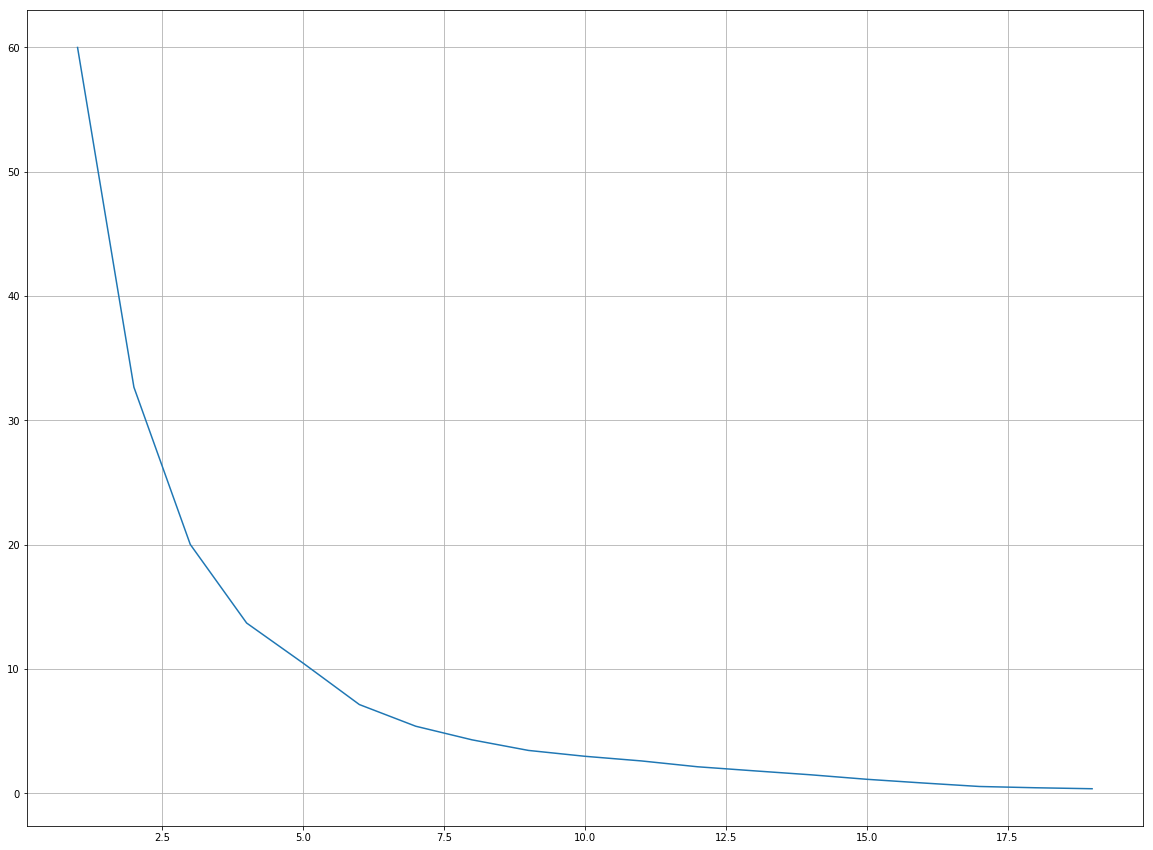

In [24]:
#Plotting the cluster sizes and wcss values
fig = plt.figure(figsize=(20,15))
plt.plot(range(1,20),wcss)
plt.grid()

In [28]:
centroids,_ = kmeans(scaled,5) #Computing K means with value 5 as number of clusters
# assign each sample to a cluster
idx,_ = vq(scaled,centroids)

**Answer 6.4**

In [29]:
new_df = pd.DataFrame(idx,porto.index)# Making a new dataframe with clusters and name of stock

In [30]:
new_df.reset_index(inplace=True)#Reseting the index

In [31]:
new_df.columns = ['Symbol', 'Cluster'] #Renaming the columns

In [33]:
new_df #Printing new dataframe

,Symbol,Cluster
0,ADANIPORTS,2
1,ASIANPAINT,2
2,AXISBANK,2
3,BAJFINANCE,0
4,BPCL,3
5,CIPLA,2
6,DRREDDY,2
7,EICHERMOT,1
8,GAIL,1
9,HDFC,2


In [34]:
pf = pd.DataFrame(scaled) #Converting scaled to pandas dataframe

In [35]:
Y = pd.concat([new_df,pf],axis=1)

In [36]:
Y

,Symbol,Cluster,0,1
0,ADANIPORTS,2,0.393506,-0.541811
1,ASIANPAINT,2,0.544831,-1.406145
2,AXISBANK,2,1.090556,-0.816164
3,BAJFINANCE,0,1.983131,-0.444354
4,BPCL,3,-0.905848,0.549918
5,CIPLA,2,0.197012,-1.018359
6,DRREDDY,2,0.423960,-0.640334
7,EICHERMOT,1,-0.563023,-0.624262
8,GAIL,1,-0.062794,-0.294685
9,HDFC,2,0.706104,-1.362229


In [39]:
Y1 = Y

In [40]:
Y1.columns=["Symbol","Cluster","Ret","Vola"]

In [41]:
Y1.head()

,Symbol,Cluster,Ret,Vola
0,ADANIPORTS,2,0.393506,-0.541811
1,ASIANPAINT,2,0.544831,-1.406145
2,AXISBANK,2,1.090556,-0.816164
3,BAJFINANCE,0,1.983131,-0.444354
4,BPCL,3,-0.905848,0.549918


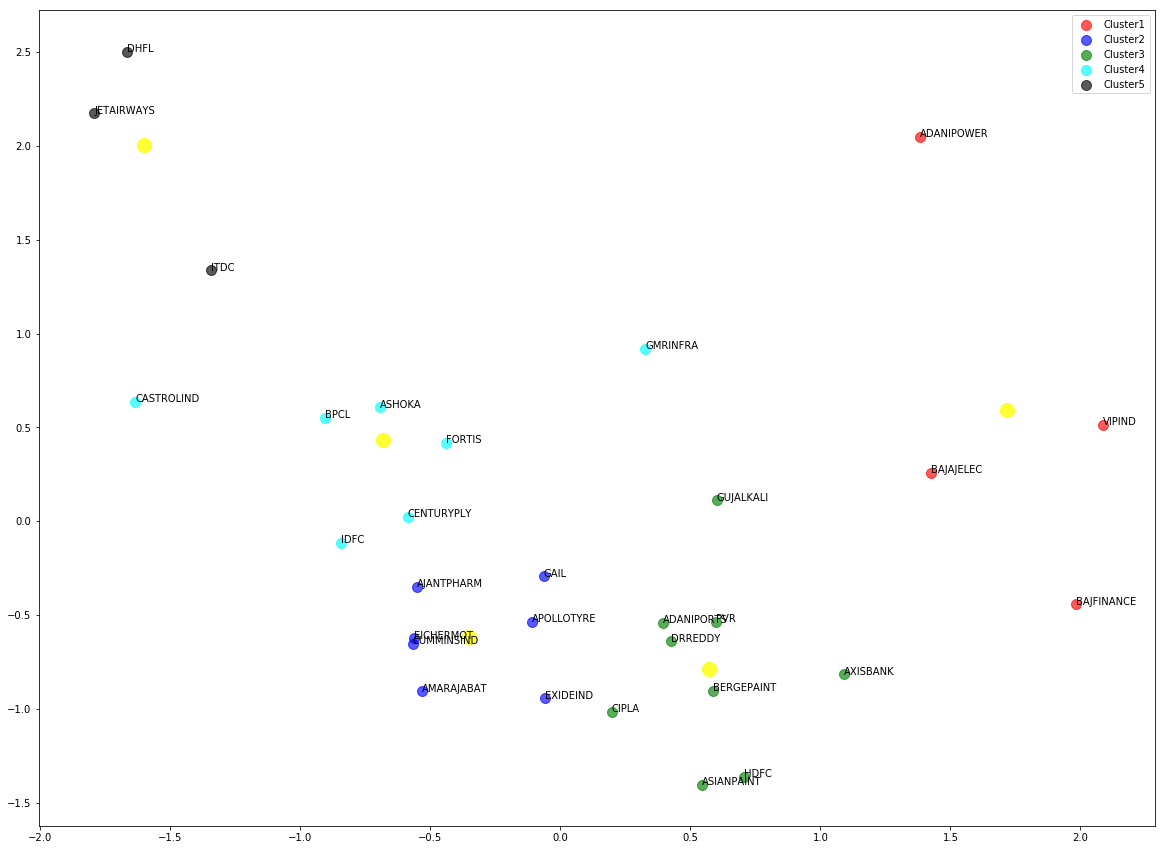

In [43]:
%matplotlib inline
fig,ax= plt.subplots(figsize=(20,15))
#Plotting scatter plots of different clusters
ax.scatter(scaled[idx==0,0],scaled[idx==0,1],s=100,c='red',label='Cluster1',alpha=0.65)
ax.scatter(scaled[idx==1,0],scaled[idx==1,1],s=100,c='blue',label='Cluster2',alpha=0.65)
ax.scatter(scaled[idx==2,0],scaled[idx==2,1],s=100,c='green',label='Cluster3',alpha=0.65)
ax.scatter(scaled[idx==3,0],scaled[idx==3,1],s=100,c='cyan',label='Cluster4',alpha=0.65)
ax.scatter(scaled[idx==4,0],scaled[idx==4,1],s=100,c='black',label='Cluster5',alpha=0.65)
ax.scatter(centroids[:,0],centroids[:,1],s=200, c='yellow', alpha = 0.8)
#Annotating text to the points
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'],point['y'],point['val'])
label_point(Y1.Ret,Y1.Vola ,Y1.Symbol, ax)
ax.legend()
